# This allows to draw maps of the area with information

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
import folium
import geopandas as gpd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import math
import folium
import datetime
from os import listdir
from os.path import isfile, join

from matplotlib import gridspec
from matplotlib.backends.backend_pdf import PdfPages


## Geographic Analysis

In [2]:
import matplotlib 
import matplotlib.pyplot as plt

font = {'size'   : 16}

matplotlib.rc('font', **font)

In [3]:
mymap = gpd.read_file('quake_data/Comuni2016/Com01012016_WGS84.shp',encoding='utf-8').to_crs('epsg:4326')
mymap = mymap[['COD_REG','COMUNE','geometry']]
mymap.columns = ['COD_REG','Comune','geometry']
map_reg = gpd.read_file('quake_data/Reg/Reg01012016_WGS84.shp').to_crs('epsg:4326')
map_reg = map_reg[map_reg['DEN_REG'].isin(['Marche','Lazio','Abruzzo','Umbria'])]
map_reg = map_reg[['COD_REG','DEN_REG','geometry']]
map_reg.columns = ['COD_REG','Regione','geometry']
map_reg.head()

COD_REG  Regione                                           geometry
9        10   Umbria  MULTIPOLYGON (((12.35804 43.61649, 12.35857 43...
10       11   Marche  POLYGON ((12.75621 43.96864, 12.75644 43.96851...
11       12    Lazio  MULTIPOLYGON (((12.24362 41.73787, 12.24419 41...
12       13  Abruzzo  MULTIPOLYGON (((14.23309 42.46541, 14.23313 42...

In [4]:
mymap.head()

COD_REG               Comune  \
0        1               Caluso   
1        1   Campiglione Fenile   
2        1              Azeglio   
3        1  Castagnole Piemonte   
4        1    Coassolo Torinese   

                                            geometry  
0  POLYGON ((7.88298 45.31995, 7.88330 45.31957, ...  
1  POLYGON ((7.33578 44.82104, 7.33678 44.82009, ...  
2  MULTIPOLYGON (((7.96907 45.44259, 7.97009 45.4...  
3  POLYGON ((7.56751 44.91729, 7.56757 44.91721, ...  
4  POLYGON ((7.44663 45.36538, 7.44749 45.36528, ...

In [5]:
variaz = pd.read_csv('quake_data/variaz_phone.csv', sep=',')
mapx = mymap.merge(variaz).merge(map_reg[['COD_REG','Regione']])
crat = mapx[mapx['Cratere Centro Italia 2016'] == 1]
mapx.head()

COD_REG               Comune  \
0       11         Ripatransone   
1       11          Trecastelli   
2       11        Massa Fermana   
3       11  Monsampietro Morico   
4       11          Servigliano   

                                            geometry  \
0  POLYGON ((13.79857 43.03372, 13.79856 43.03366...   
1  POLYGON ((13.11299 43.72705, 13.11340 43.72703...   
2  POLYGON ((13.47962 43.16622, 13.47990 43.16615...   
3  POLYGON ((13.56050 43.08014, 13.56080 43.07984...   
4  POLYGON ((13.51740 43.08507, 13.51762 43.08429...   

   Cratere Centro Italia 2016     Variaz  Variaz_init  Variaz_end Regione  
0                           0  -2.061919     2.106746   -3.370964  Marche  
1                           0  -1.904407    -4.724712   -1.018775  Marche  
2                           1  -2.134708     6.907224   -4.974058  Marche  
3                           1  -3.335351     8.837161   -7.157765  Marche  
4                           1 -17.060111    -7.863376  -19.948072  Marche

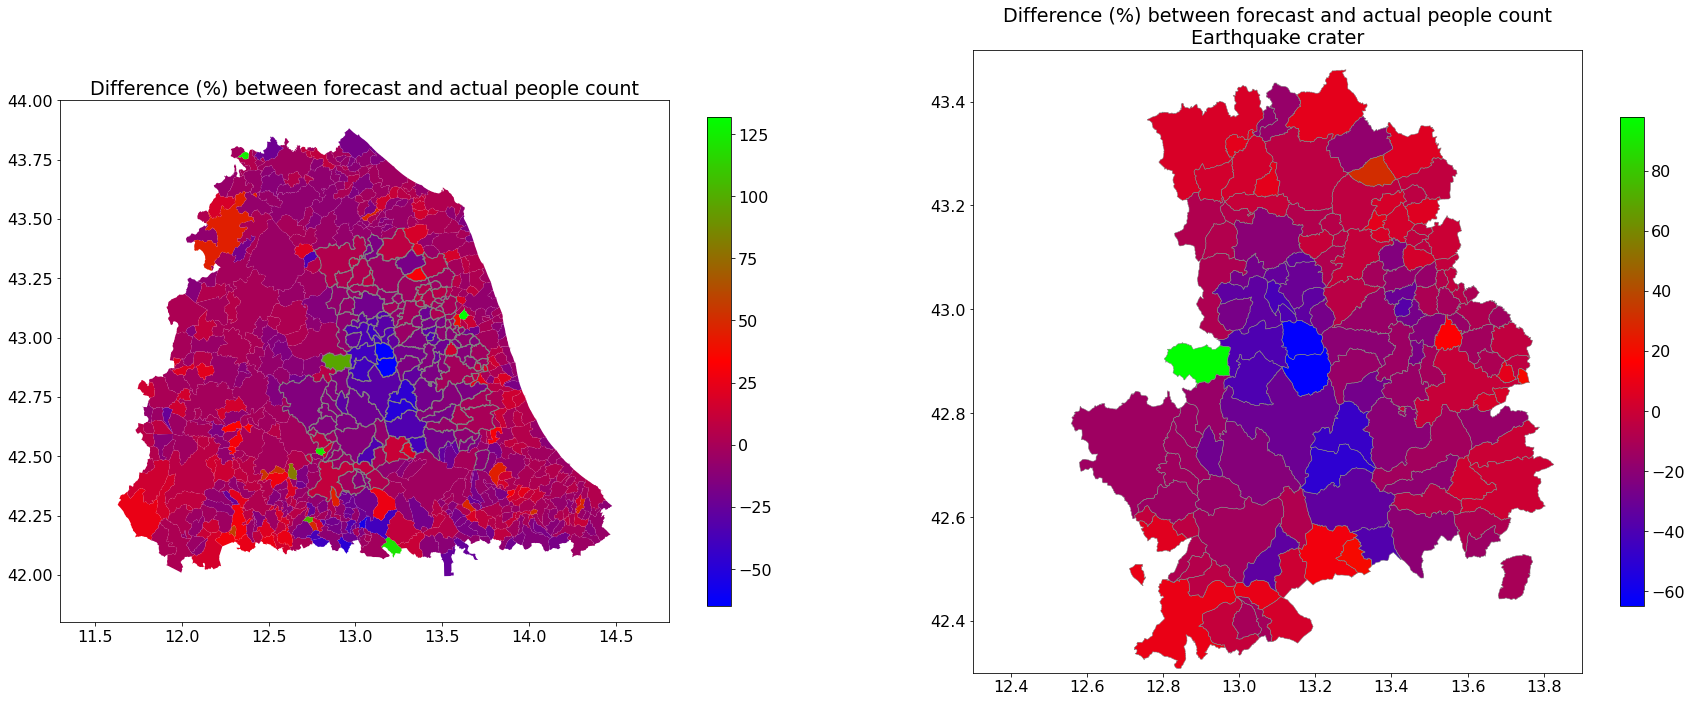

In [6]:
# https://matplotlib.org/2.0.2/users/colormaps.html
nrow=1
ncol=2
fig, axes = plt.subplots(nrow, ncol, figsize=(30,30))
ax3 = mapx.plot(column='Variaz', cmap = 'brg', legend= True, legend_kwds={'shrink': 0.3}, ax=axes[0])
crat.plot(ax=ax3, color='none', edgecolor='grey', linewidths=1)
ax3.set_ylim(41.8,44)
ax3.set_xlim(11.3,14.8)
ax3.title.set_text('Difference (%) between forecast and actual people count')

ax3 = crat.plot(column='Variaz', cmap = 'brg', legend= True, legend_kwds={'shrink': 0.3}, ax=axes[1])
crat.plot(ax=ax3, color='none', edgecolor='grey', linewidths=0.5)
ax3.set_ylim(42.3,43.5)
ax3.set_xlim(12.3,13.9)   
ax3.title.set_text('Difference (%) between forecast and actual people count\nEarthquake crater')
plt.savefig('images/map.pdf',bbox_inches='tight')  
plt.show()

In [50]:
x_regression = alldata_reshape = pd.read_csv('quake_data/variaz_phone_all.csv')
mapx = mymap.merge(x_regression).merge(map_reg[['COD_REG','Regione']])
mapx
crat = mapx[mapx['Cratere Centro Italia 2016'] == 1]

mapx['dpd'] = (mapx['media_dopo'] - mapx['media_prima']) / mapx['media_prima'] * 100
crat['dpd'] = (crat['media_dopo'] - crat['media_prima']) / crat['media_prima'] * 100

crat.head(2)




C:\Users\Marco\anaconda3\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


COD_REG               Comune  \
2       11        Massa Fermana   
3       11  Monsampietro Morico   

                                            geometry  \
2  POLYGON ((13.47962 43.16622, 13.47990 43.16615...   
3  POLYGON ((13.56050 43.08014, 13.56080 43.07984...   

   Cratere Centro Italia 2016  media_prima   media_dopo  varPhones    Variaz  \
2                         1.0   974.995237  1140.420434   0.169668 -2.134708   
3                         1.0   947.830563   873.025429  -0.078922 -3.335351   

   Variaz_init  Variaz_end Regione        dpd  
2     6.907224   -4.974058  Marche  16.966770  
3     8.837161   -7.157765  Marche  -7.892247

In [51]:
crat_border = gpd.GeoDataFrame(geometry=[crat.geometry.unary_union], crs=crat.crs)

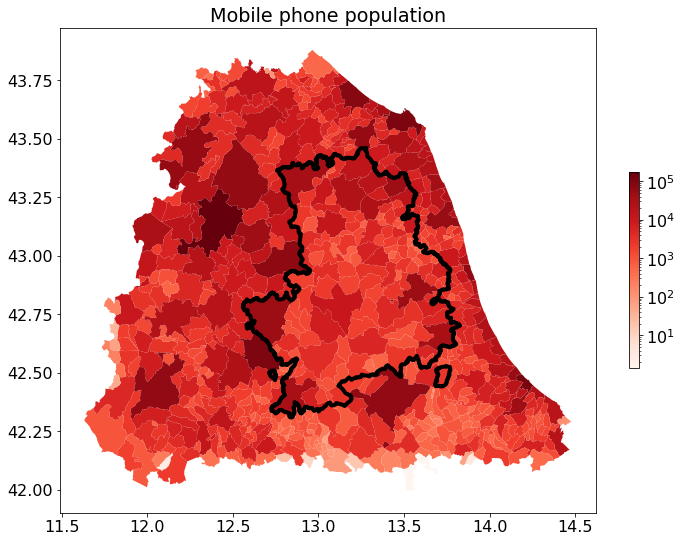

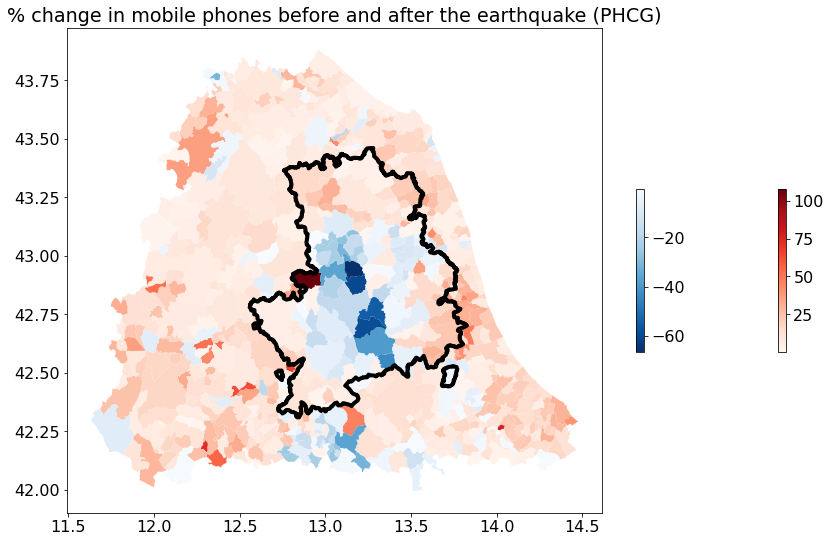

In [80]:
z = mapx

# https://matplotlib.org/2.0.2/users/colormaps.html
nrow=1
ncol=1
fig, axes = plt.subplots(nrow, ncol, figsize=(12,12))

ax3 = z.plot(column='media_prima', cmap = 'Reds', legend= True, legend_kwds={'shrink': 0.3}, ax=axes, norm=matplotlib.colors.LogNorm(vmin=z.media_prima.min(), vmax=z.media_prima.max()))
ax3 = crat_border.plot(color='none', edgecolor='black', linewidths=4, ax=axes,legend=True)
ax3.title.set_text('Mobile phone population')
plt.savefig('images/map_resident1.pdf',bbox_inches='tight')  
plt.show()


fig, axes = plt.subplots(nrow, ncol, figsize=(15,15))
ax3 = z[z['dpd'] > 0].plot(column='dpd', cmap = 'Reds', legend= True, legend_kwds={'shrink': 0.2}, ax=axes)
ax3 = z[z['dpd'] <= 0].plot(column='dpd', cmap = 'Blues_r', legend= True, legend_kwds={'shrink': 0.2}, ax=axes)
ax3 = crat_border.plot(color='none', edgecolor='black', linewidths=4, ax=axes)
ax3.title.set_text('% change in mobile phones before and after the earthquake (PHCG)')
plt.savefig('images/map_resident2.png',bbox_inches='tight')  
plt.show()


# Geographic Analysis with Folium

In [9]:
mapx = mapx.set_crs(epsg=4326)
mapx['geometry'] = mapx['geometry'].simplify(0.001, preserve_topology=False)
mapx['Variaz'] = mapx['Variaz'].round(0)

def style_function(x):
    color = '#000000'
    fill = '#ffffff'
    return {'fillColor': fill, 
            'color':color, 
            'fillOpacity': 0.1, 
            'weight': 0.5}

def highlight_function(x):
    color = '#000000'
    fill =  '#000000'
    return {'fillColor': fill, 
            'color':color, 
            'fillOpacity': 0.50, 
            'weight': 0.1}



other = folium.features.GeoJson(
    mapx,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['Regione','Comune','Cratere Centro Italia 2016','Variaz'],
        aliases=['Regione','Comune','Cratere Centro Italia 2016','Variaz %'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)


myscale = [min(mapx['Variaz']),-30,-20,0,20,30,max(mapx['Variaz'])]

m = folium.Map(location=[mapx.centroid.y.mean(), mapx.centroid.x.mean()], tiles="cartodbpositron", zoom_start=8)
folium.Choropleth(
 geo_data=mapx,
 name='Choropleth',
 data=mapx,
 columns=['Comune','Variaz'],
 key_on="feature.properties.Comune",
 fill_color='RdBu',
 threshold_scale=myscale,
 fill_opacity=1,
 line_opacity=0.2,
 legend_name='YOY %',
 #smooth_factor=0
).add_to(m)


for _, r in map_reg.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry'])#.simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,style_function=lambda x: {'fillColor': '#ffffff','color': '#000000'})
    geo_j.add_to(m)

crat_border = gpd.GeoDataFrame(geometry=[crat.geometry.unary_union], crs=crat.crs)
sim_geo = gpd.GeoSeries(crat_border['geometry']).simplify(tolerance=0.001)
geo_j = sim_geo.to_json()
geo_j = folium.GeoJson(data=geo_j,style_function=lambda x: {'fillColor': '#ffffff','color': '#ff0000'})
geo_j.add_to(m)

m.add_child(other)
m.keep_in_front(other)
folium.LayerControl().add_to(m)

m

C:\Users\Marco\AppData\Local\Temp/ipykernel_2524/2856674958.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[mapx.centroid.y.mean(), mapx.centroid.x.mean()], tiles="cartodbpositron", zoom_start=8)
C:\Users\Marco\AppData\Local\Temp/ipykernel_2524/2856674958.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[mapx.centroid.y.mean(), mapx.centroid.x.mean()], tiles="cartodbpositron", zoom_start=8)
